In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import *
%matplotlib inline

In [5]:
def converter(v):
    return (v/3600)*1000

In [6]:
#Stopping sight distance Xssd
a = 2 #m/s^2
tp = 2.5 #seconds
v = 50 #km/hr
v = converter(v) #m/s
xssd = tp*v + (v**2 / 2*a)
print(f'Stopping sight distance: {xssd} m')

Stopping sight distance: 227.6234567901234 m


In [7]:
#Clearance distance Xcl
w = 10 #m
L = 3.2 #m 
ty = 5.5 #seconds
xcl = ty*v-w-L
print(f'Clearing sight distance: {xcl} m')

Clearing sight distance: 63.18888888888888 m


In [8]:
def traffic_safety(x0,xcl,xssd):
    clear = False
    stop = False
    if x0 < xcl:
        clear = True
        return clear
    elif x0 > xssd:
        stop = True
        return stop
    return False

**Louis can travel 100 m. Is he in a safe situation?**

In [9]:
xlouis = 100
can_louis_survive = traffic_safety(xlouis,xcl,xssd)
print(can_louis_survive)

False


**Too bad Louis is in a dilema zone because xlouis is in between that value.**

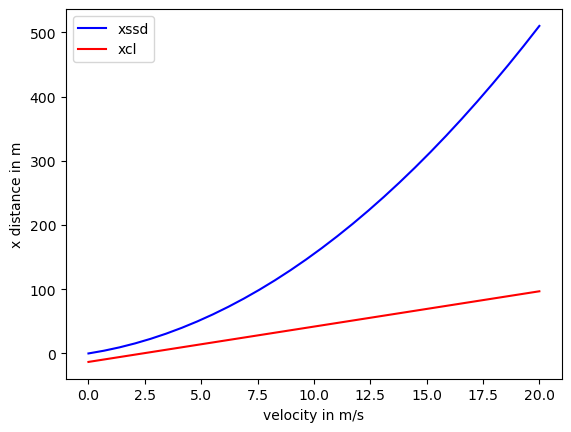

In [10]:
tp = 2.2
v = np.linspace(0,20,30)
xcl = lambda xcl: ty*v-w-L 
y_scl = xcl(v)
xssd = lambda xcl: ty*v + (v**2 / 2*a)
y_ssd = xssd(v)

plt.plot(v,y_ssd,label='xssd',color='blue')
plt.plot(v,y_scl,label='xcl',color='red')
plt.legend()
plt.xlabel('velocity in m/s')
plt.ylabel('x distance in m')
plt.show()